In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('churn_dataset.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))  # Remove non-numeric characters
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric data type

In [6]:
df = df.fillna(df['TotalCharges'].mean())

In [7]:
df = df.drop('customerID',axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
numerical_cols = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']

### Removing Outliers

### Define the lower and upper bounds for outliers removal (e.g., 1.5 times the IQR)
lower_bound = df[numerical_cols].quantile(0.25) - 1.5 * (df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25))
upper_bound = df[numerical_cols].quantile(0.75) + 1.5 * (df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25))

### Remove rows with outliers
df = df.loc[(df[numerical_cols[0]] >= lower_bound[numerical_cols[0]]) &
            (df[numerical_cols[0]] <= upper_bound[numerical_cols[0]]) &
            (df[numerical_cols[1]] >= lower_bound[numerical_cols[1]]) &
            (df[numerical_cols[1]] <= upper_bound[numerical_cols[1]]) &
            (df[numerical_cols[2]] >= lower_bound[numerical_cols[2]]) &
            (df[numerical_cols[2]] <= upper_bound[numerical_cols[2]]) &
            (df[numerical_cols[3]] >= lower_bound[numerical_cols[3]]) &
            (df[numerical_cols[3]] <= upper_bound[numerical_cols[3]])]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

In [12]:
# Encoding Categorical Data and Standardizing Numerical data
label_enc = LabelEncoder()
scaler = StandardScaler()


categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for col in categorical_cols:
    X[col] = label_enc.fit_transform(X[col])
    
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
# Encode the target variable
y = label_enc.fit_transform(y)

In [13]:
# Splitting Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [14]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.7745599091425327


In [15]:
# SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8143100511073254


In [16]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.817717206132879


In [17]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7336740488358887


In [18]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7984099943214082


In [19]:
algorithms = ['KNN', 'SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [knn_accuracy,svm_accuracy,logreg_accuracy,dt_accuracy,rf_accuracy]

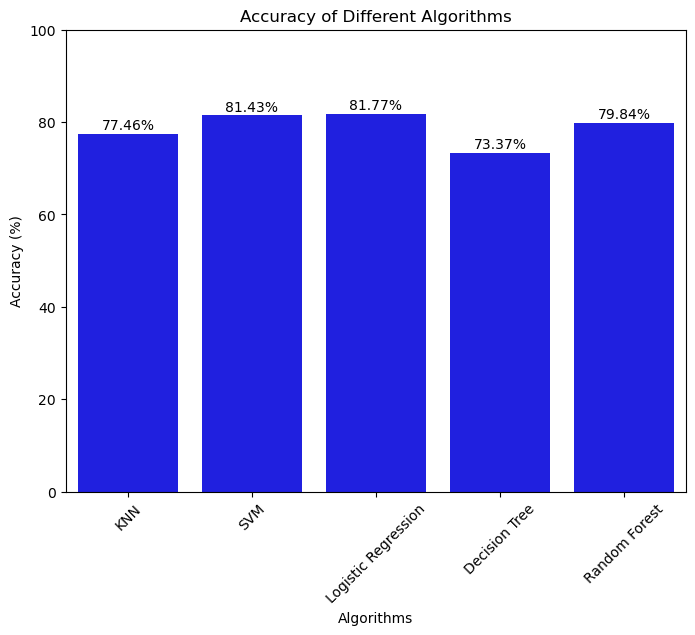

In [20]:
# Convert accuracies to percentages
accuracies_pct = [acc * 100 for acc in accuracies]

# Create bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=algorithms, y=accuracies_pct, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Algorithms')
plt.ylim([0, 100])  # Set y-axis limits
plt.xticks(rotation=45)

# Add accuracy values as annotations
for i, acc in enumerate(accuracies_pct):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center')

# Display the plot
plt.show()

Conclusion: As it can be seen from the graph for Churn Prediction Accuracy by 5 classification algorithms like KNN,SVM,Logistic Regression,Decision Tree and Random Forest with Logistic Regression producing results with highest accuracy among all other algorithms with 81.71%. SVM with 81.64% which is closer to Logistic Regression. So, Logistic Regression is best to predict the Customer Churn.  

Note: Removing Outliers reduced data by 16% and despite that the lead Model that is Logistic regression accuracy reduced
by 0.06% and other models accuracy improved but still it is not so significant improvement in the accuracy and as such
outliers are not removed